In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df= pd.read_csv('C:\\Users\\Divya\\OneDrive\\Desktop\\Time series\\Rose.csv')

In [3]:
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [5]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [6]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
# Adding the time stamp to the data frame

df['Time_Stamp'] = pd.DataFrame(date,columns=['Year-Month'])
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [8]:
# Setting Time_stamp as an index and dropping the YearMonth column from the dataset

df = df.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [9]:
df.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [10]:
df.isnull().sum()

Rose    2
dtype: int64

In [11]:
df.dtypes

Rose    float64
dtype: object

In [12]:
df['1994']

,Rose
Time_Stamp,
1994-01-31,30.0
1994-02-28,35.0
1994-03-31,42.0
1994-04-30,48.0
1994-05-31,44.0
1994-06-30,45.0
1994-07-31,NaN
1994-08-31,NaN
1994-09-30,46.0


# Missing value Treatment

In [13]:
df.converted  = df.Rose
ts = df.converted.resample('D').mean() 
df.Rose = ts.interpolate(method = 'linear')
df.Rose['1994']

<ipython-input-13-012d01b14502>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.converted  = df.Rose


Time_Stamp
1994-01-31    30.000000
1994-02-28    35.000000
1994-03-31    42.000000
1994-04-30    48.000000
1994-05-31    44.000000
1994-06-30    45.000000
1994-07-31    45.336957
1994-08-31    45.673913
1994-09-30    46.000000
1994-10-31    51.000000
1994-11-30    63.000000
1994-12-31    84.000000
Name: Rose, dtype: float64

In [14]:
df.isnull().sum()

Rose    0
dtype: int64

Now we have the data ready for time series analysis.

# Plot the Time Series to understand the behaviour of the data:

In [15]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

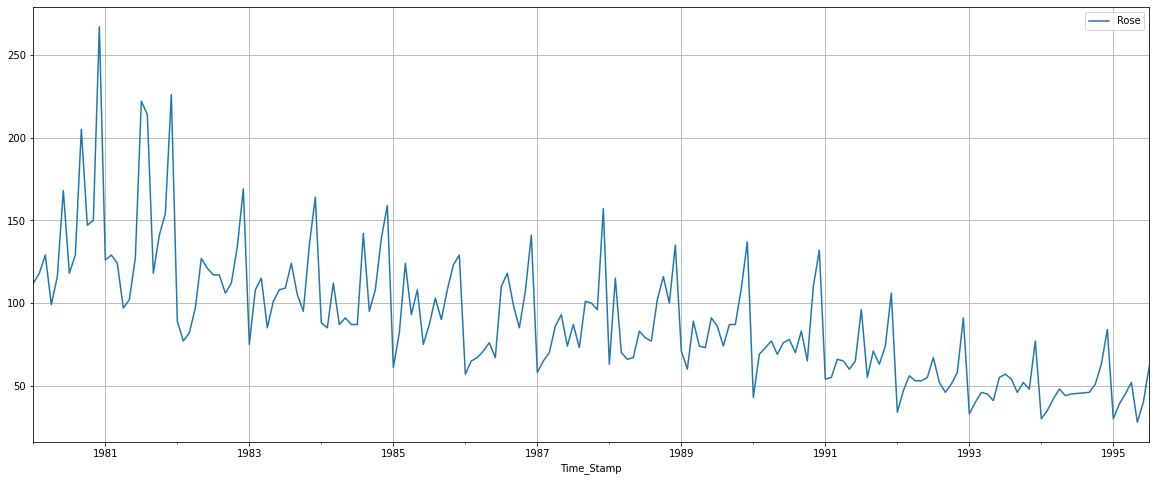

In [16]:
df.plot();
plt.grid()

From the plot, we can see that there is a decreasing trend involved and also there is a seasonal pattern. Since this is a monthly sales data of wine, we can expect certain amount of seasonality in the data.

# Descriptive Statistics:

In [17]:
df.describe()

,Rose
count,187.000000
mean,89.914497
std,39.238259
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


* There are total 187 observations in the dataset. There are 2 null values or missing values in the data. Imputed the missing values using linear interpolation technique.

* The data includes monthly sales of 'Rose wine' with dates ranging from Jan 1980 to July 1995.

* The average amount of sales is 90. The minimum amount of sales is observed as 28 on any given day where as the maximum went upto 267.

* From the above table, it indicates that there is trend and seasonality in the data and the sales of wine went upto 267 at certain time of the year.

Plot a boxplot to understand the spread of sales across different years and within different months across years:

# Yearly Boxplot:

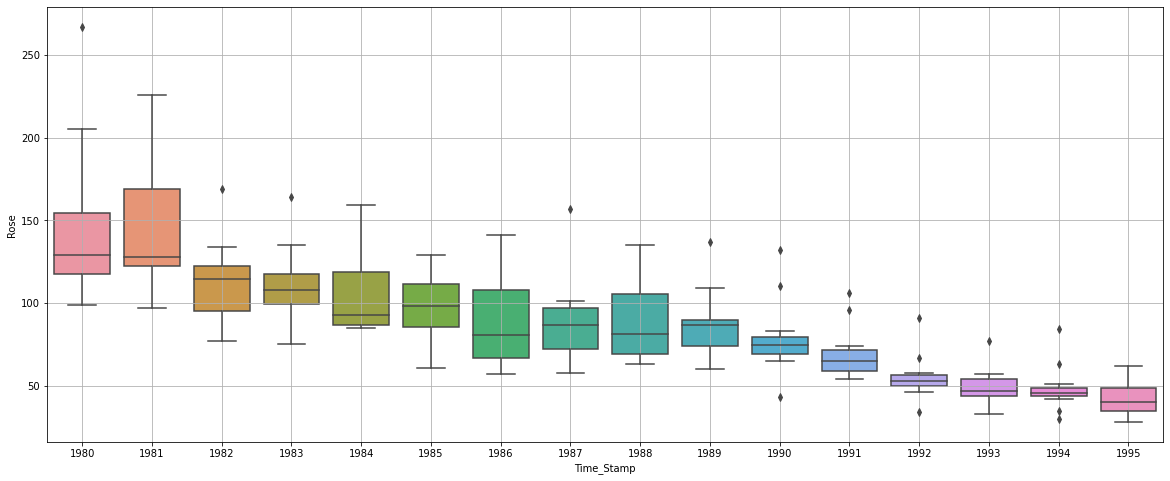

In [18]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

* From the above boxplot, we see that there is decreasing trend in the sales of the wine. 
* The highest number of sales were observed in year 1980.
* There are few outliers in the data.
* The lowest number of sales were observed in 1995. However, we have data only till July for the year 1995.

# Monthly Boxplot:

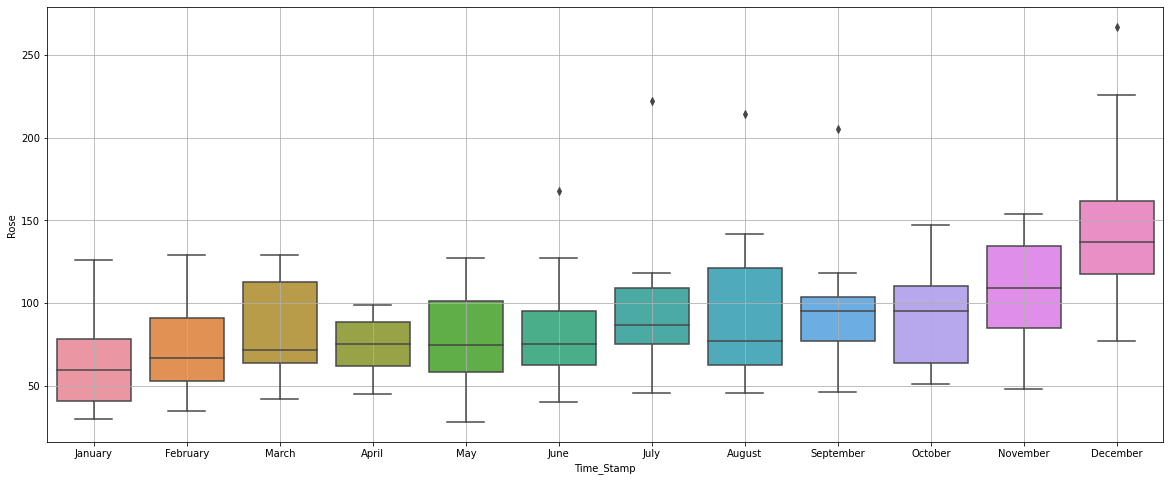

In [19]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

* From the above graph, we can infer that, there is seasonality in the data.

* The sales in the first half of the year are less compared to second half of the year across all the years.

* The sales of the wine increase from August to December every year.

* The highest sales are observed in December every year. Since december is a holiday month, the sales of that month are exceptionally high compared to other months of the year.

* Hence, business can increase the production and cost of the wine accordingly to increase their profit margin.

* There are very few outliers in the data.

* The sales of the wine are constant for the months April, May and June every year.

# Plot a time series monthplot to understand the spread of sales across different years and within different months across years:

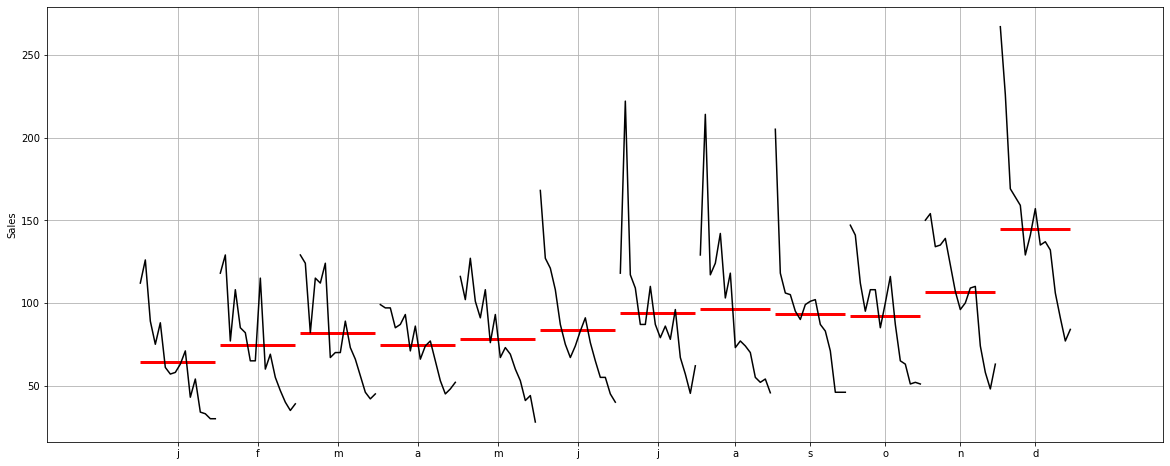

In [20]:
from statsmodels.graphics.tsaplots import month_plot
rcParams['figure.figsize'] = 20,8

month_plot(df['Rose'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Wine Sales' in this case) across various months. The red line is the median value.

# Plot a graph of monthly Wine Sales across years:

In [21]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


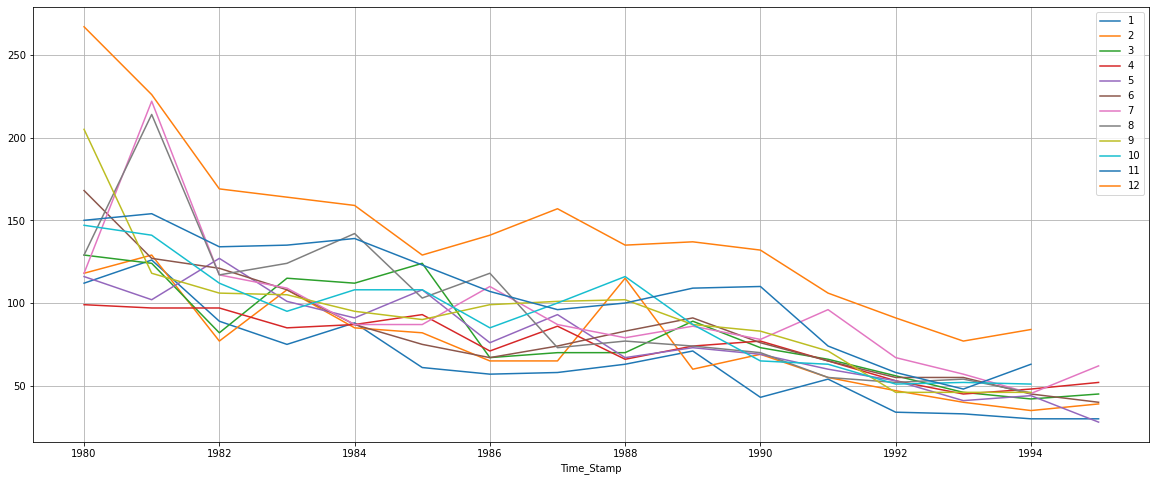

In [22]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

The above graph shows that, wine sales are exceptionally high in December across all the years.

# Plot the Empirical Cumulative Distribution:

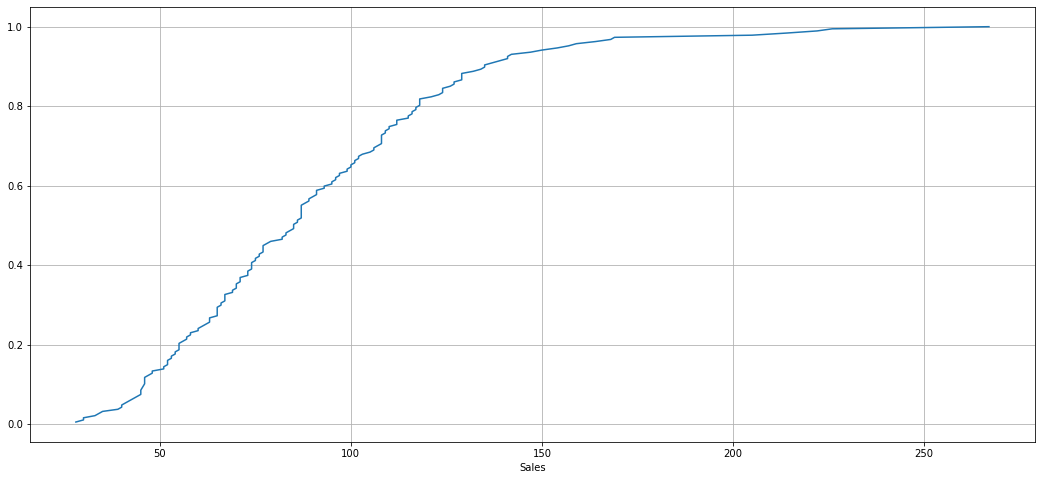

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

* This particular graph tells us what percentage of data points refer to what number of Sales.

* The ECDF essentially allows us to plot a feature of our data in order from least to greatest and see the whole feature as if is distributed across the data set.

* Above graph says that, 65 percent of the observations have sales less than 100.

* 95 percent of observations have sales less than 150. 

# Plot the average Wine Sales per month and the month on month percentage change of Wine Sales:

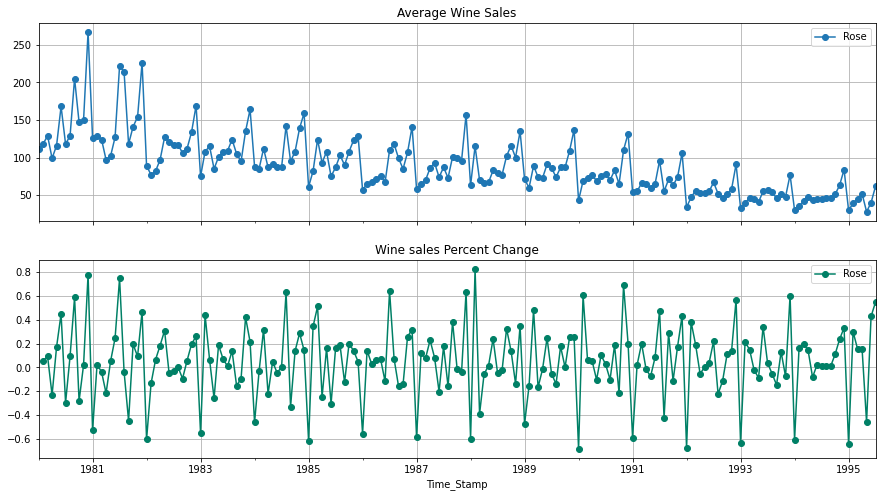

In [24]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Wine sales Percent Change",grid=True)

The above two graphs tells us the Average 'wine sales' and the Percentage change of 'wine sales' with respect to the time.

# Decompose the Time Series and plot the different components:

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition

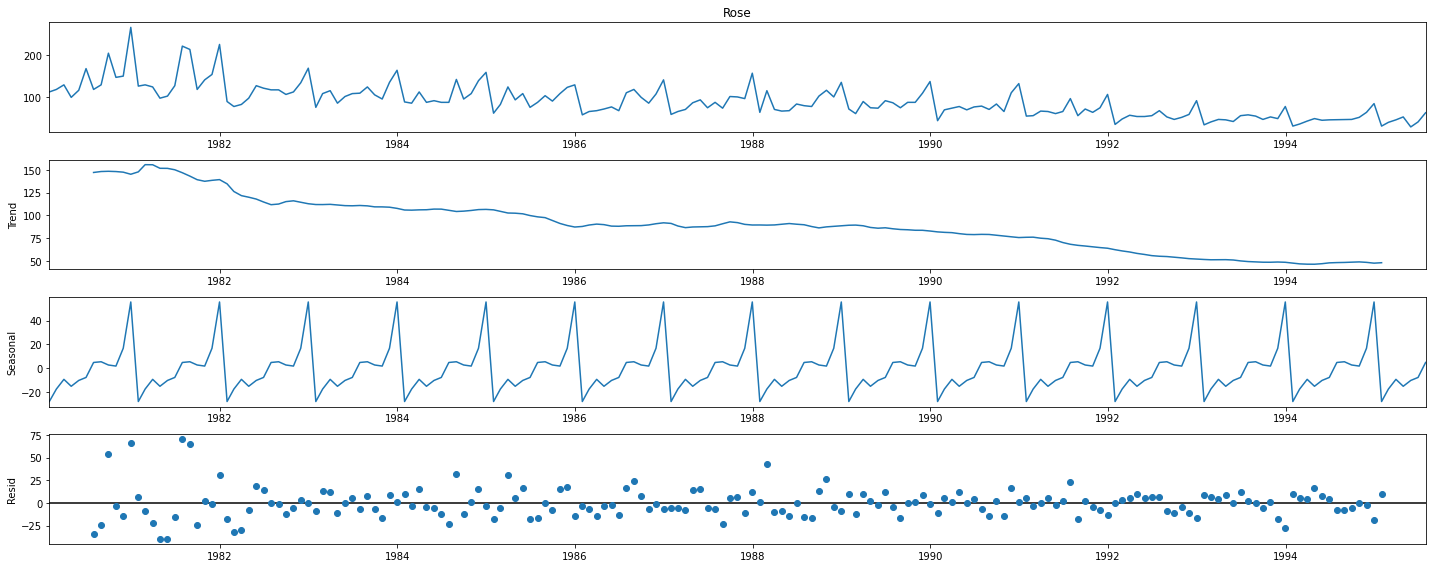

In [27]:
decomposition_additive = seasonal_decompose(df['Rose'],model='additive')
decomposition_additive.plot();

In [28]:
trend_additive = decomposition_additive.trend
seasonality_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

print('Trend','\n',trend_additive.head(12),'\n')
print('Seasonality','\n',seasonality_additive.head(12),'\n')
print('Residual','\n',residual_additive.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908708
1980-02-29   -17.435675
1980-03-31    -9.285895
1980-04-30   -15.098395
1980-05-31   -10.196609
1980-06-30    -7.678752
1980-07-31     4.897089
1980-08-31     5.500109
1980-09-30     2.774625
1980-10-31     1.871848
1980-11-30    16.846848
1980-12-31    55.713514
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980423
1980-08-31   -24.625109
1980-09-30    53.850375
1980-10-31    -2.955181
1980-11-30   -14.263514
1980-12-31    66.16

We see that there is trend and seasonality in the data. The residuals or error component are scattered around zero and have high standard deviation.

# Multiplicative Decomposition

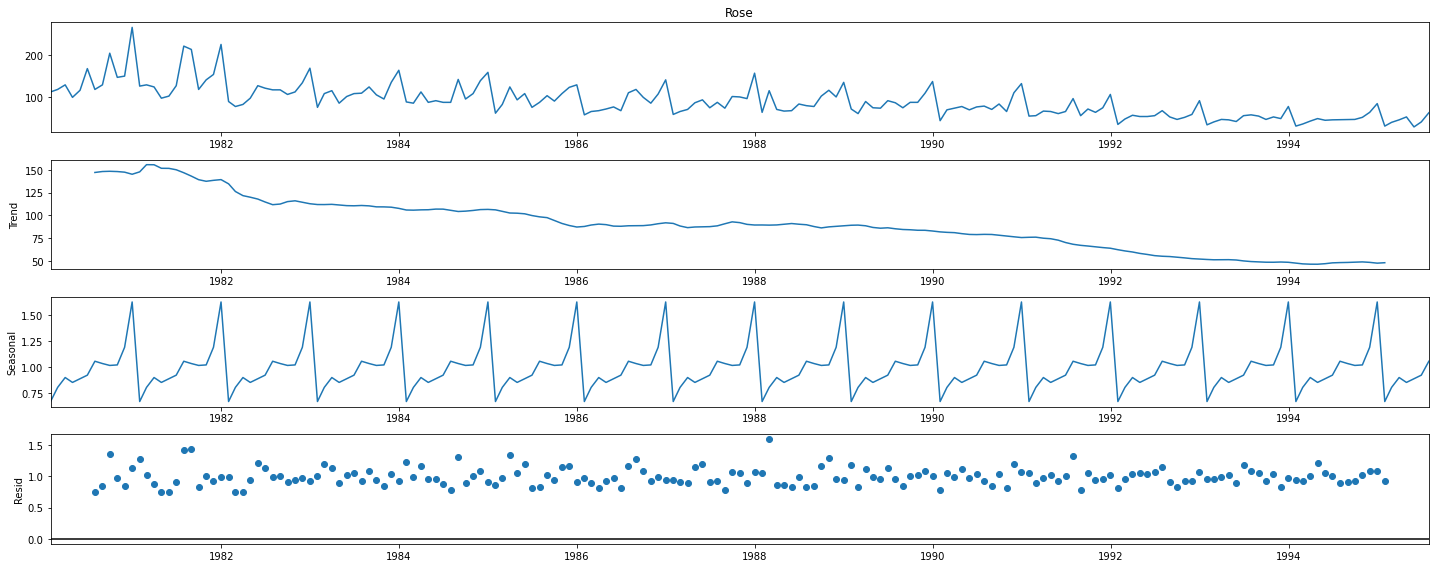

In [29]:
decomposition_multiplicative = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition_multiplicative.plot();

In [30]:
trend_multiplicative = decomposition_multiplicative.trend
seasonality_multiplicative = decomposition_multiplicative.seasonal
residual_multiplicative = decomposition_multiplicative.resid

print('Trend','\n',trend_multiplicative.head(12),'\n')
print('Seasonality','\n',seasonality_multiplicative.head(12),'\n')
print('Residual','\n',residual_multiplicative.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901163
1980-04-30    0.854023
1980-05-31    0.889414
1980-06-30    0.923984
1980-07-31    1.058042
1980-08-31    1.035890
1980-09-30    1.017647
1980-10-31    1.022572
1980-11-30    1.192347
1980-12-31    1.628644
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758256
1980-08-31    0.840713
1980-09-30    1.357675
1980-10-31    0.970772
1980-11-30    0.853379
1980-12-31    1.129647
Name: resid, dtype:

Compared to additive decomposition, the residuals bit more aligned here and have less standard deviation.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [31]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [32]:
## This is to display multiple data frames from one cell

from IPython.display import display

In [33]:
print('First few rows of Training Data')
display(train.head())

print('Last few rows of Training Data')
display(train.tail())

print('First few rows of Test Data')
display(test.head())

print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [34]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


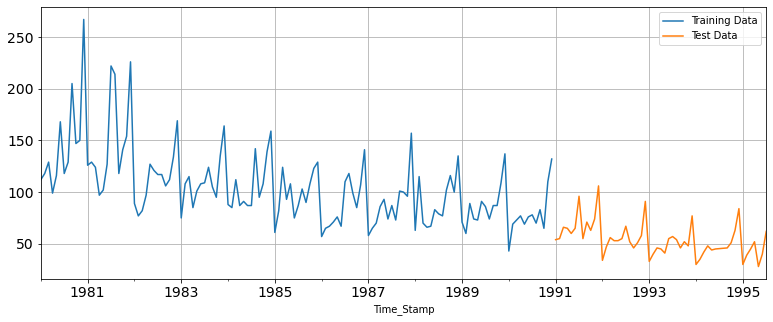

In [35]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Building different models and comparing the accuracy metrics:

# Model 1: Linear Regression

For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [36]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [37]:
LR_train = train.copy()
LR_test = test.copy()

In [38]:
LR_train['time'] = train_time
LR_test['time'] = test_time

print('First few rows of Training Data','\n',LR_train.head(),'\n')
print('Last few rows of Training Data','\n',LR_train.tail(),'\n')
print('First few rows of Test Data','\n',LR_test.head(),'\n')
print('Last few rows of Test Data','\n',LR_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



Now that our training and test data has been modified, let us go ahead use linear regression to build the model on the training data and test the model on the test data.

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
LR = LinearRegression()

In [41]:
LR.fit(LR_train[['time']],LR_train['Rose'].values)

LinearRegression()

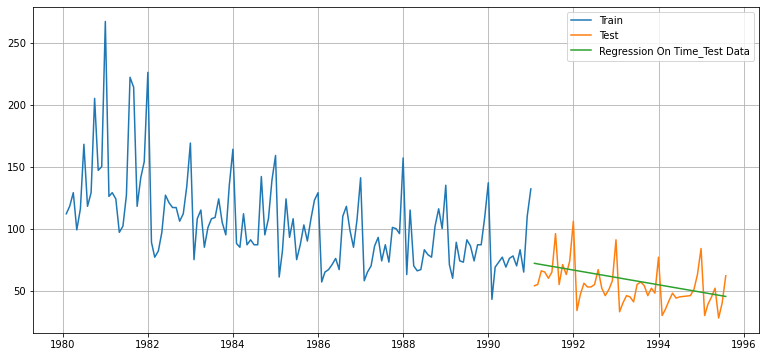

In [42]:
test_predictions_LR = LR.predict(LR_test[['time']])
LR_test['RegOnTime'] = test_predictions_LR

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

# Model Evaluation

In [43]:
## Test Data - RMSE

rmse_LR_test = metrics.mean_squared_error(test['Rose'],test_predictions_LR,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_LR_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [44]:
results_df = pd.DataFrame({'Test RMSE': [rmse_LR_test]},index=['RegressionOnTime'])
results_df

,Test RMSE
RegressionOnTime,15.268885


# Model 2: Naive Approach

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today, therefore the prediction for day after tomorrow is also today.

In [45]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [46]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

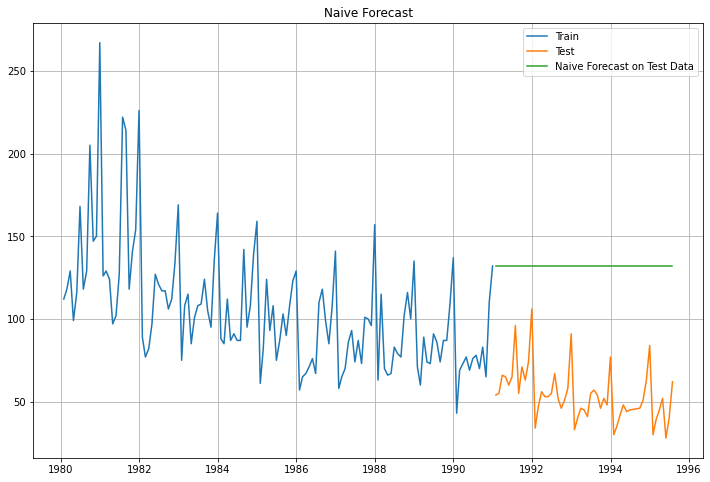

In [47]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

# Model Evaluation

In [48]:
## Test Data - RMSE

rmse_naive_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_naive_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [49]:
results_df2 = pd.DataFrame({'Test RMSE': [rmse_naive_test]},index=['NaiveModel'])

results_df = pd.concat([results_df, results_df2])
results_df

,Test RMSE
RegressionOnTime,15.268885
NaiveModel,79.718559


# Model 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [50]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [51]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


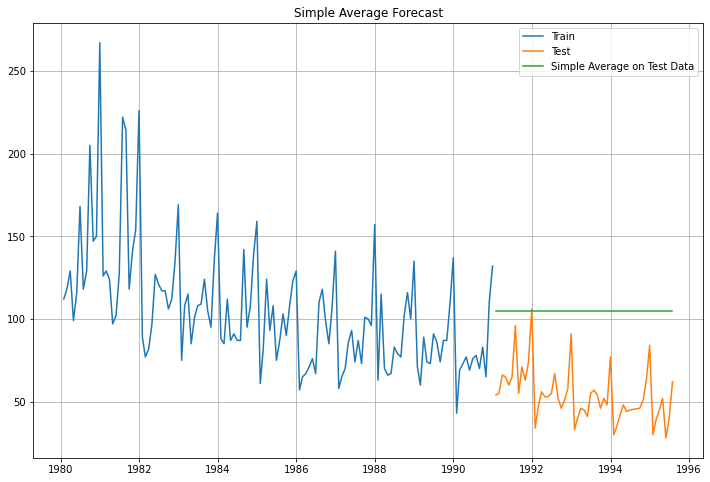

In [52]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [53]:
## Test Data - RMSE 

rmse_SimpleAverage_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_SimpleAverage_test))

For Simple Average forecast on the Test Data,  RMSE is 53.460


In [54]:
results_df3 = pd.DataFrame({'Test RMSE': [rmse_SimpleAverage_test]},index=['SimpleAverageModel'])

results_df = pd.concat([results_df, results_df3])
results_df

,Test RMSE
RegressionOnTime,15.268885
NaiveModel,79.718559
SimpleAverageModel,53.460350


# Model 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here. For Moving Average, we are going to average over the entire data.

In [55]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


# Trailing moving averages

In [56]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


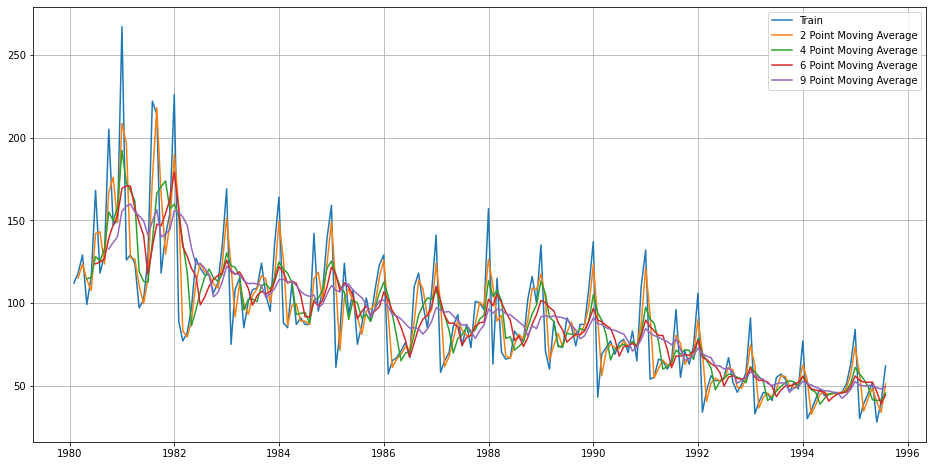

In [57]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [58]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

In [59]:
print(trailing_MovingAverage_train.shape)
print(trailing_MovingAverage_test.shape)

(132, 5)
(55, 5)


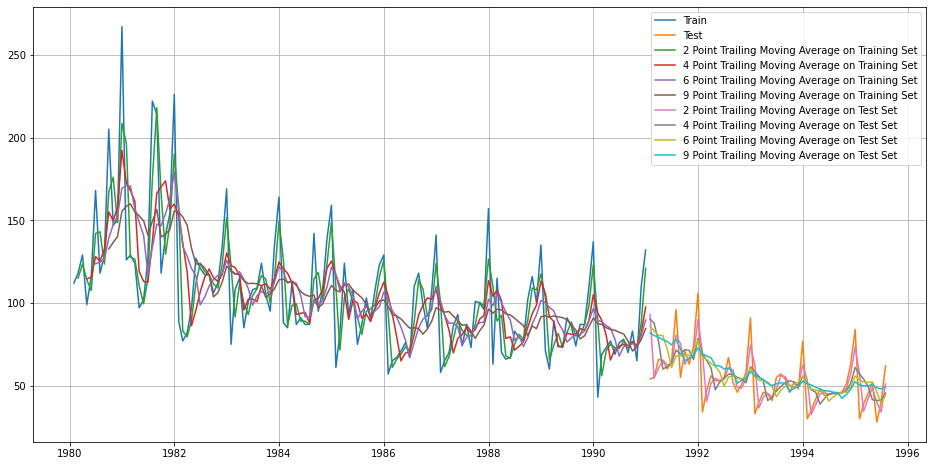

In [60]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

# Model Evaluation on Test data

In [61]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_ma_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_ma_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_ma_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_ma_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_ma_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_ma_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_ma_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_ma_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [62]:
results_df4 = pd.DataFrame({'Test RMSE': [rmse_ma_test_2,rmse_ma_test_4
                                          ,rmse_ma_test_6,rmse_ma_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results_df = pd.concat([results_df, results_df4])
results_df

,Test RMSE
RegressionOnTime,15.268885
NaiveModel,79.718559
SimpleAverageModel,53.460350
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451364
6pointTrailingMovingAverage,14.566269
9pointTrailingMovingAverage,14.727594


Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

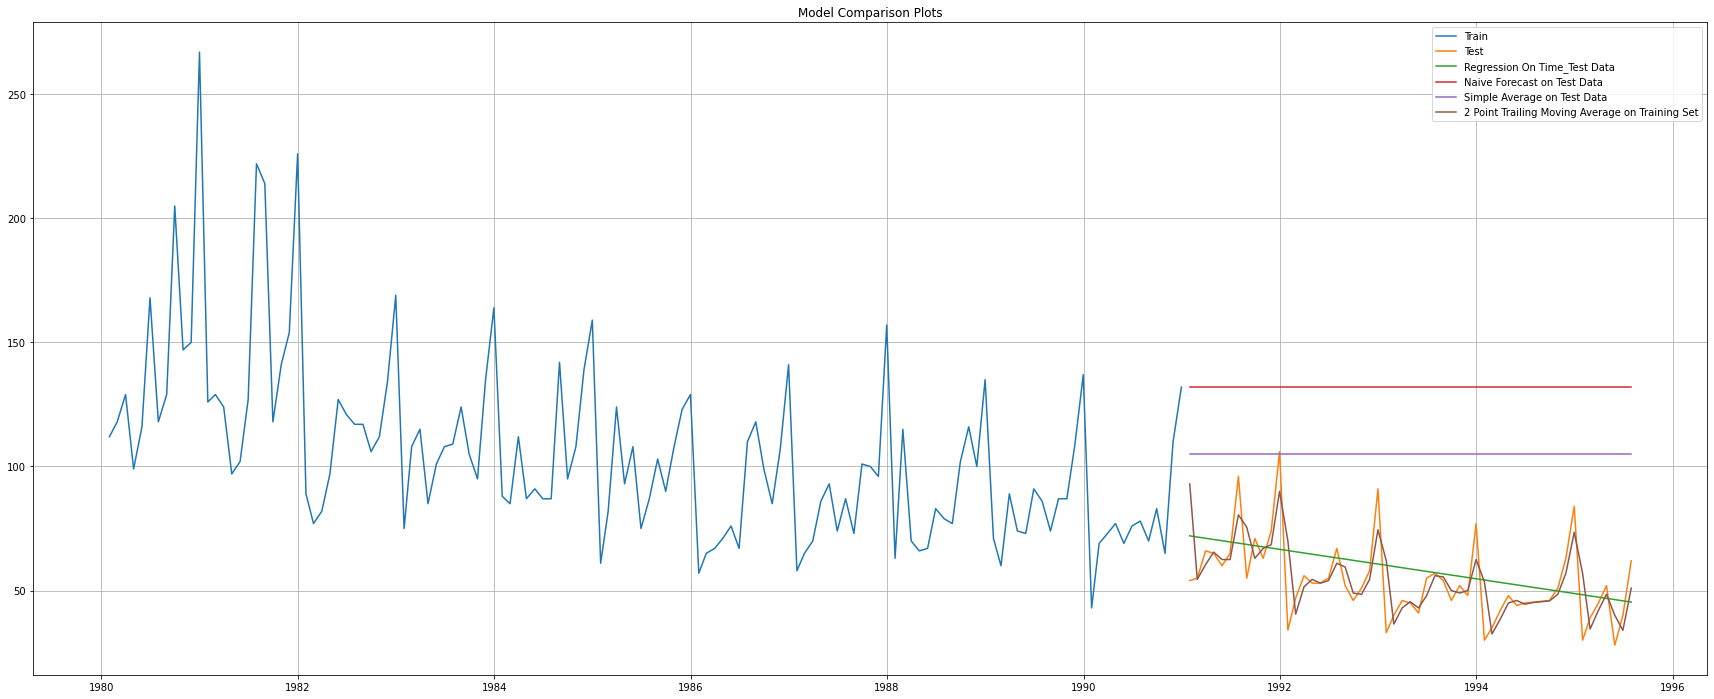

In [63]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Model 5: Simple Exponential Smoothing (SES)

In [64]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [65]:
SES_train = train.copy()
SES_test = test.copy()

In [66]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [67]:
model_SES_autofit = model_SES.fit(optimized=True)

In [68]:
model_SES_autofit.params

{'smoothing_level': 0.09874995336438987,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38681121931316,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.105001
1991-02-28,55.0,87.105001
1991-03-31,66.0,87.105001
1991-04-30,65.0,87.105001
1991-05-31,60.0,87.105001


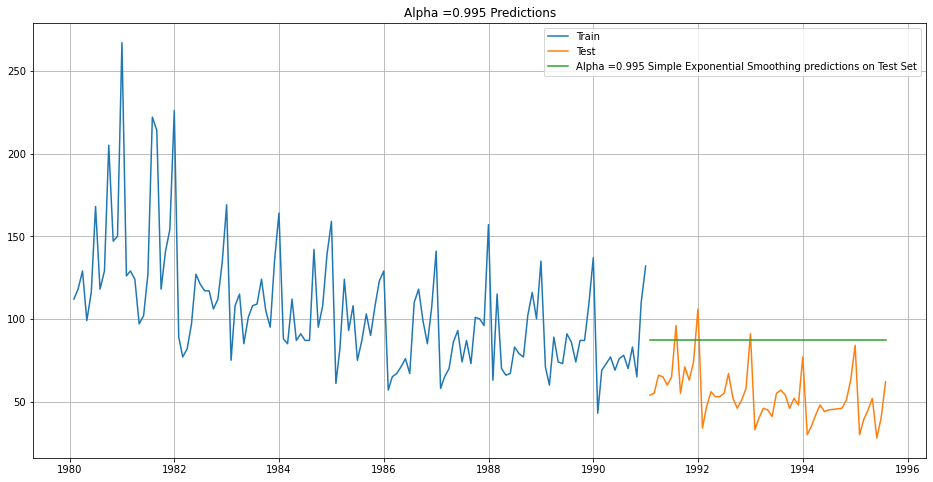

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

Model Evaluation for 𝛼 = 0.995 : Simple Exponential Smoothing

In [71]:
## Test Data

rmse_SES_test= metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SES_test))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [72]:
results_df5 = pd.DataFrame({'Test RMSE': [rmse_SES_test]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df5])
results_df

,Test RMSE
RegressionOnTime,15.268885
NaiveModel,79.718559
SimpleAverageModel,53.460350
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451364
6pointTrailingMovingAverage,14.566269
9pointTrailingMovingAverage,14.727594
"Alpha=0.995,SimpleExponentialSmoothing",36.796020


Setting different alpha values:

The higher the alpha value, more weightage is given to the most recent observation. That means, what happened recently will happen again. We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [73]:
## First we will define an empty dataframe to store our values from the loop

results_df6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
results_df6

,Alpha Values,Train RMSE,Test RMSE


In [74]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    results_df6 = results_df6.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i 
                                      ,'Test RMSE':rmse_SES_test_i}, ignore_index=True)

# Model Evaluation

In [75]:
results_df6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,31.815610,36.827810
1,0.2,31.979391,41.361654
2,0.3,32.470164,47.504600
3,0.4,33.035130,53.767186
4,0.5,33.682839,59.641567
5,0.6,34.441171,64.971071
6,0.7,35.323261,69.697946
7,0.8,36.334596,73.773777
8,0.9,37.482782,77.139061


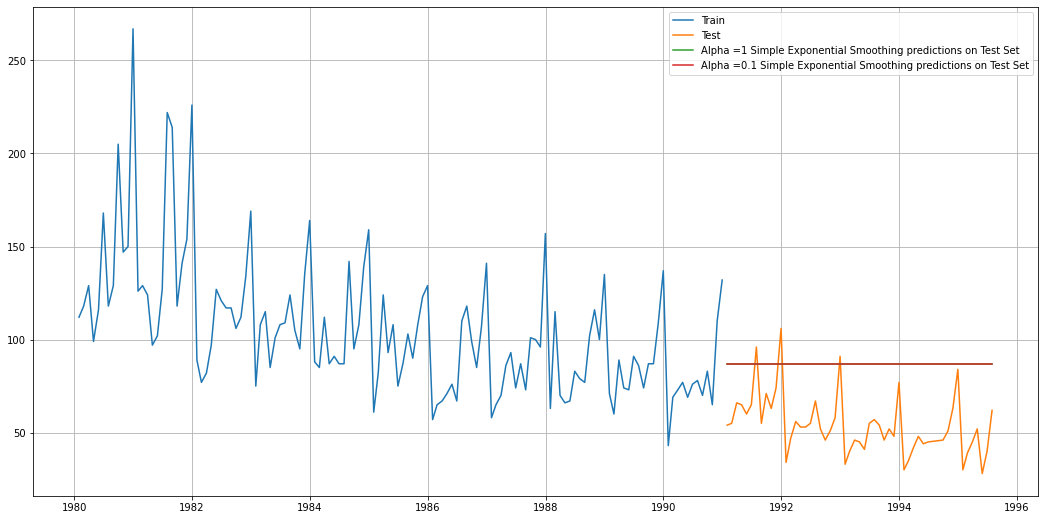

In [76]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [77]:
results_df6_SES = pd.DataFrame({'Test RMSE': [results_df6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

results_df= pd.concat([results_df, results_df6_SES])
results_df

,Test RMSE
RegressionOnTime,15.268885
NaiveModel,79.718559
SimpleAverageModel,53.460350
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451364
6pointTrailingMovingAverage,14.566269
9pointTrailingMovingAverage,14.727594
"Alpha=0.995,SimpleExponentialSmoothing",36.796020
"Alpha=0.1,SimpleExponentialSmoothing",36.827810


# Model 6: Double Exponential Smoothing (Holt's Model)

Two parameters 𝛼 and 𝛽 are estimated in this model. Level and Trend are accounted for in this model.

In [78]:
DES_train = train.copy()
DES_test = test.copy()

In [79]:
model_DES = Holt(DES_train['Rose'])

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [80]:
## First we will define an empty dataframe to store our values from the loop

results_df7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
results_df7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [81]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_DES_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_DES_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        results_df7 = results_df7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                          ,'Test RMSE':rmse_DES_test}, ignore_index=True)

In [82]:
results_df7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.923185
1,0.1,0.2,33.450729,48.688399
2,0.1,0.3,33.145789,78.156381
3,0.1,0.4,33.262191,99.583210
4,0.1,0.5,33.688415,124.269461
...,...,...,...,...
95,1.0,0.6,51.831610,801.679952
96,1.0,0.7,54.497039,841.892307
97,1.0,0.8,57.365879,853.965271
98,1.0,0.9,60.474309,834.710670


In [83]:
results_df7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.923185
1,0.1,0.2,33.450729,48.688399
10,0.2,0.1,33.097427,65.731452
2,0.1,0.3,33.145789,78.156381
20,0.3,0.1,33.611269,98.653063


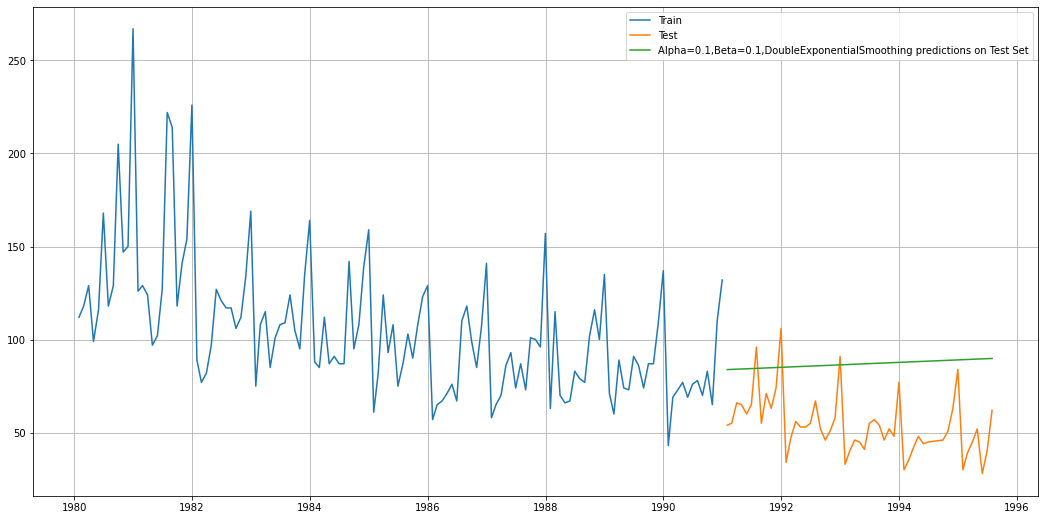

In [84]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [85]:
results_df7_DES = pd.DataFrame({'Test RMSE': [results_df7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df7_DES])
results_df

,Test RMSE
RegressionOnTime,15.268885
NaiveModel,79.718559
SimpleAverageModel,53.460350
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451364
6pointTrailingMovingAverage,14.566269
9pointTrailingMovingAverage,14.727594
"Alpha=0.995,SimpleExponentialSmoothing",36.796020
"Alpha=0.1,SimpleExponentialSmoothing",36.827810
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923185


# Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters 𝛼 , 𝛽 and 𝛾 are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [86]:
TES_train = train.copy()
TES_test = test.copy()

In [87]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [88]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [89]:
model_TES_autofit.params

{'smoothing_level': 0.06571007449183297,
 'smoothing_trend': 0.051867105713176015,
 'smoothing_seasonal': 0.0015637515713898,
 'damping_trend': nan,
 'initial_level': 47.81887301367471,
 'initial_trend': -0.2961562797665537,
 'initial_seasons': array([2.35763018, 2.67367218, 2.92146068, 2.55308191, 2.87099548,
        3.13124987, 3.44178442, 3.66118656, 3.47154364, 3.39670325,
        3.95879831, 5.46173463]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.677627
1991-02-28,55.0,64.136371
1991-03-31,66.0,69.860745
1991-04-30,65.0,60.897998
1991-05-31,60.0,68.228324


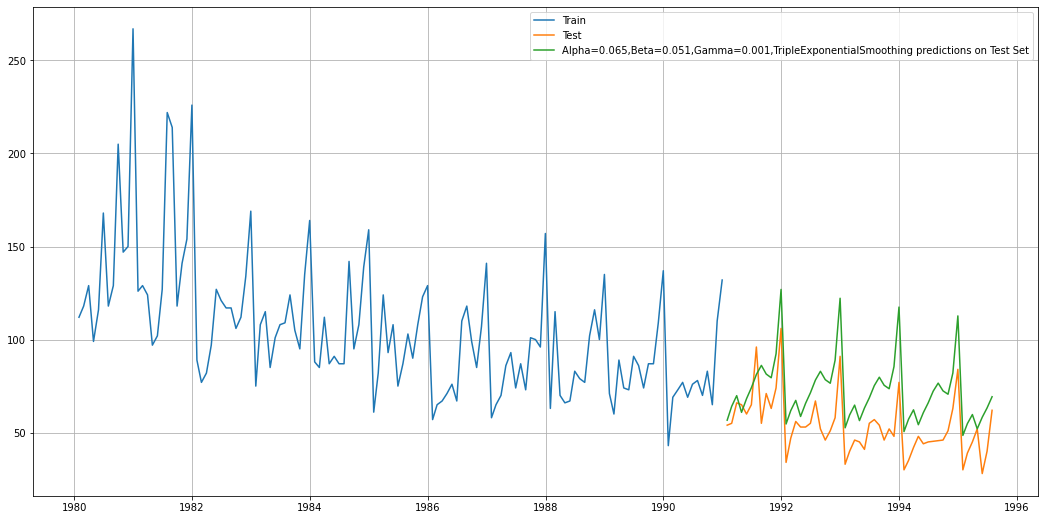

In [91]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.065,Beta=0.051,Gamma=0.001,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [92]:
## Test Data

rmse_TES_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.065,Beta=0.051,Gamma=0.001, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_TES_test))

For Alpha=0.065,Beta=0.051,Gamma=0.001, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.990


In [93]:
results_df8 = pd.DataFrame({'Test RMSE': [rmse_TES_test]}
                           ,index=['Alpha=0.065,Beta=0.051,Gamma==0.001,TripleExponentialSmoothing'])

results_df = pd.concat([results_df, results_df8])
results_df

,Test RMSE
RegressionOnTime,15.268885
NaiveModel,79.718559
SimpleAverageModel,53.460350
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451364
6pointTrailingMovingAverage,14.566269
9pointTrailingMovingAverage,14.727594
"Alpha=0.995,SimpleExponentialSmoothing",36.796020
"Alpha=0.1,SimpleExponentialSmoothing",36.827810
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923185


In [94]:
## First we will define an empty dataframe to store our values from the loop

results_df_TES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
results_df_TES

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [95]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_TES_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_TES_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            results_df_TES = results_df_TES.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}
                                                 , ignore_index=True)

In [96]:
results_df_TES

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,25.216699,12.790605
1,0.1,0.1,0.2,24.057626,11.913913
2,0.1,0.1,0.3,23.645037,11.849688
3,0.1,0.1,0.4,23.570939,12.130853
4,0.1,0.1,0.5,23.718878,12.639364
...,...,...,...,...,...
995,1.0,1.0,0.6,28358.458519,9603.635051
996,1.0,1.0,0.7,30724.126331,23029.955358
997,1.0,1.0,0.8,1218.755446,9626.710890
998,1.0,1.0,0.9,14150.253251,9691.905408


In [97]:
results_df_TES.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
11,0.1,0.2,0.2,24.365597,9.640616
12,0.1,0.2,0.3,23.969166,9.935672
10,0.1,0.2,0.1,25.529854,9.943512
142,0.2,0.5,0.3,27.631767,10.026322
151,0.2,0.6,0.2,28.289836,10.031754


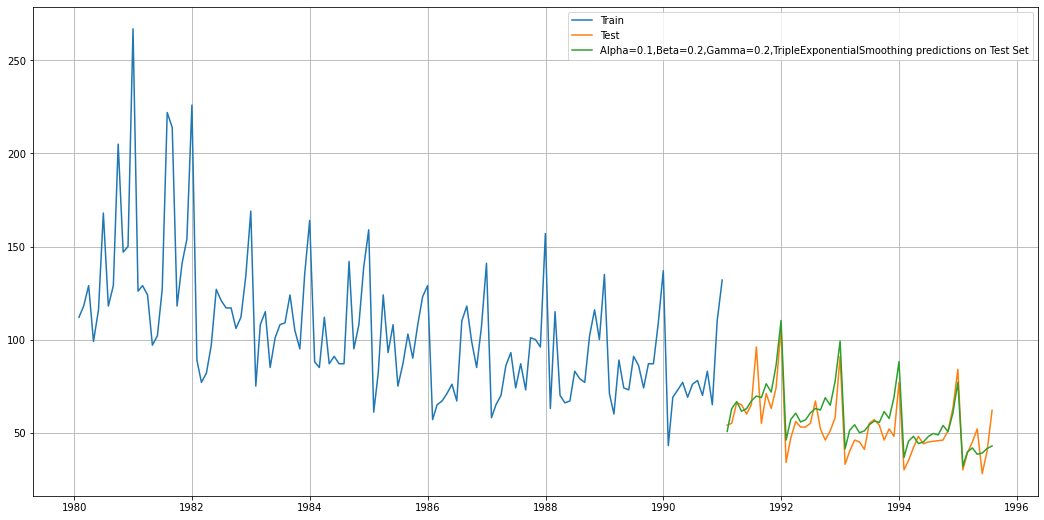

In [98]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [99]:
results_TES = pd.DataFrame({'Test RMSE': [results_df_TES.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing'])

results_df = pd.concat([results_df, results_TES])
results_df

,Test RMSE
RegressionOnTime,15.268885
NaiveModel,79.718559
SimpleAverageModel,53.460350
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451364
6pointTrailingMovingAverage,14.566269
9pointTrailingMovingAverage,14.727594
"Alpha=0.995,SimpleExponentialSmoothing",36.796020
"Alpha=0.1,SimpleExponentialSmoothing",36.827810
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923185


For this data, we have both seasonality and trend. So by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, I have gone ahead to build different models on the data and have compared these models with the best RMSE value on the test data.

We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters 𝛼 = 0.1, 𝛽 = 0.2 and 𝛾 = 0.2.

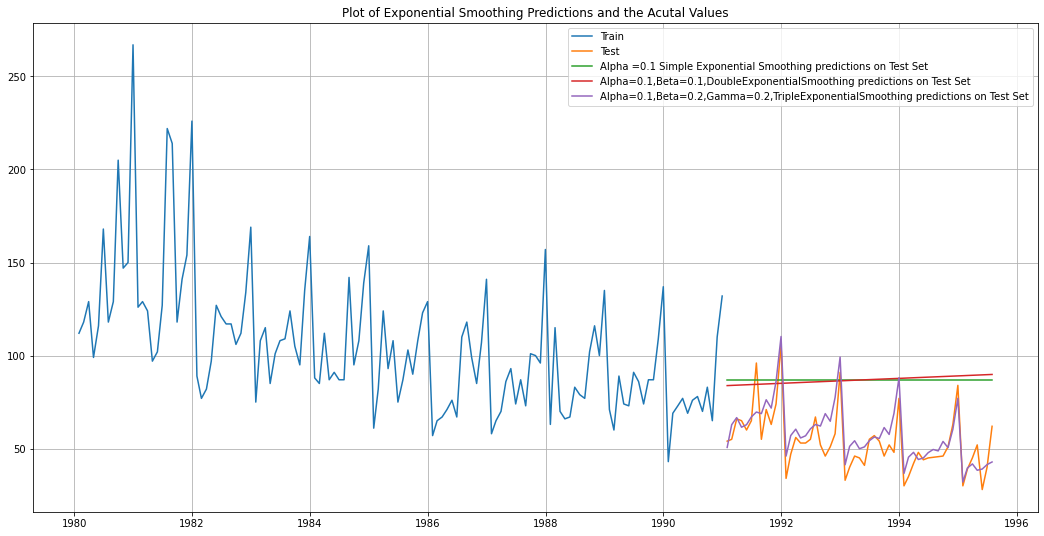

In [100]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

# Check for stationarity of the whole Time Series data:

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

𝐻0 : The Time Series has a unit root and is thus non-stationary.

𝐻1 : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the 𝛼 value.

In [101]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

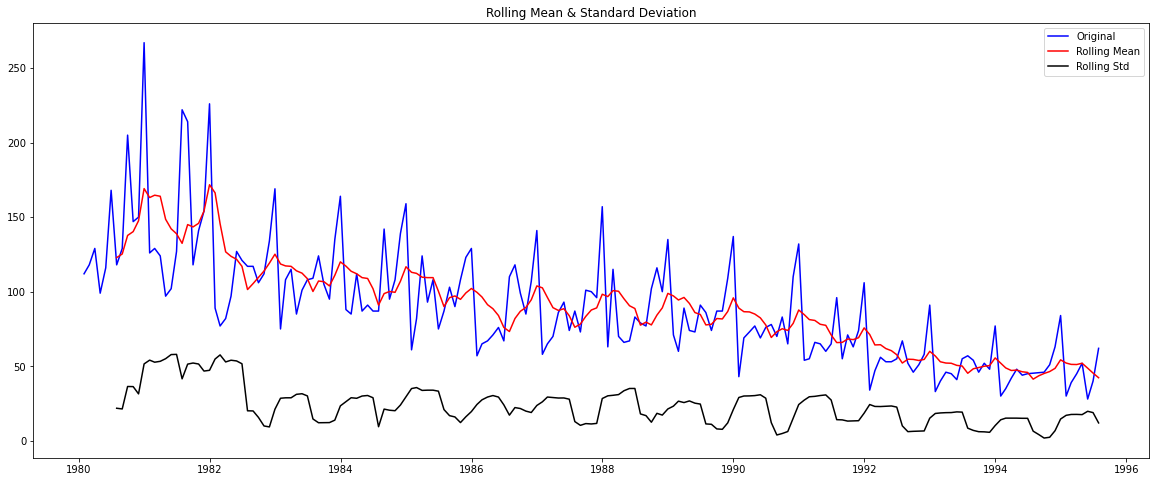

Results of Dickey-Fuller Test:
Test Statistic                  -1.876719
p-value                          0.343091
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [102]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

test_stationarity(df['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

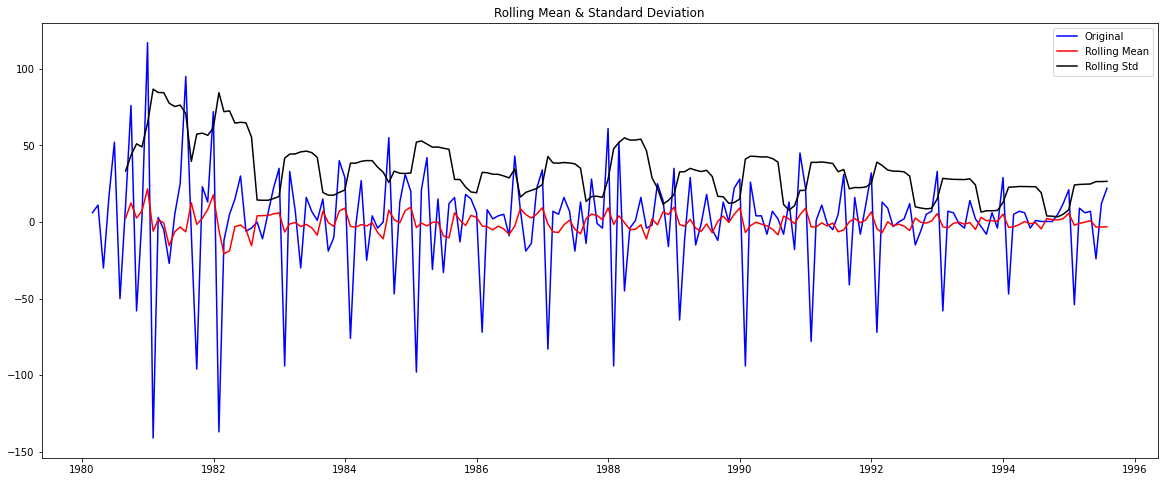

Results of Dickey-Fuller Test:
Test Statistic                -8.044395e+00
p-value                        1.810868e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [103]:
test_stationarity(df['Rose'].diff().dropna())

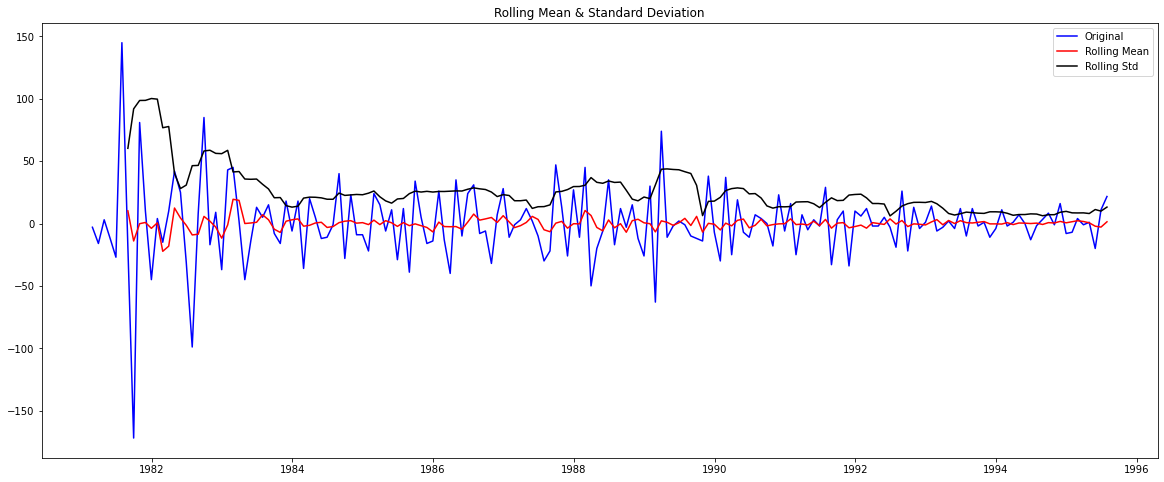

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [110]:
plt.figure(figsize=(20,8))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna())

We see that at α = 0.05 the Time Series is indeed stationary.

# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data:

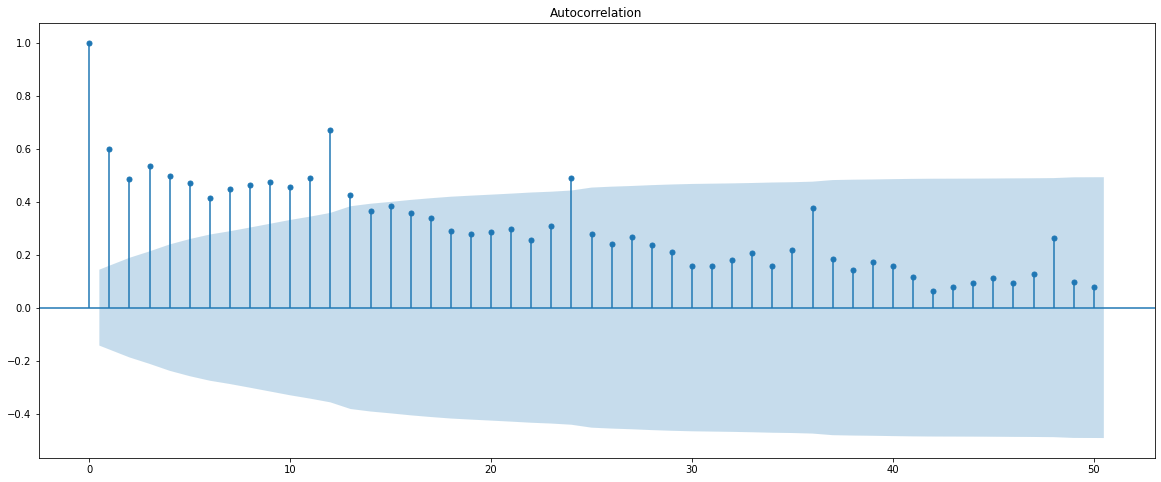

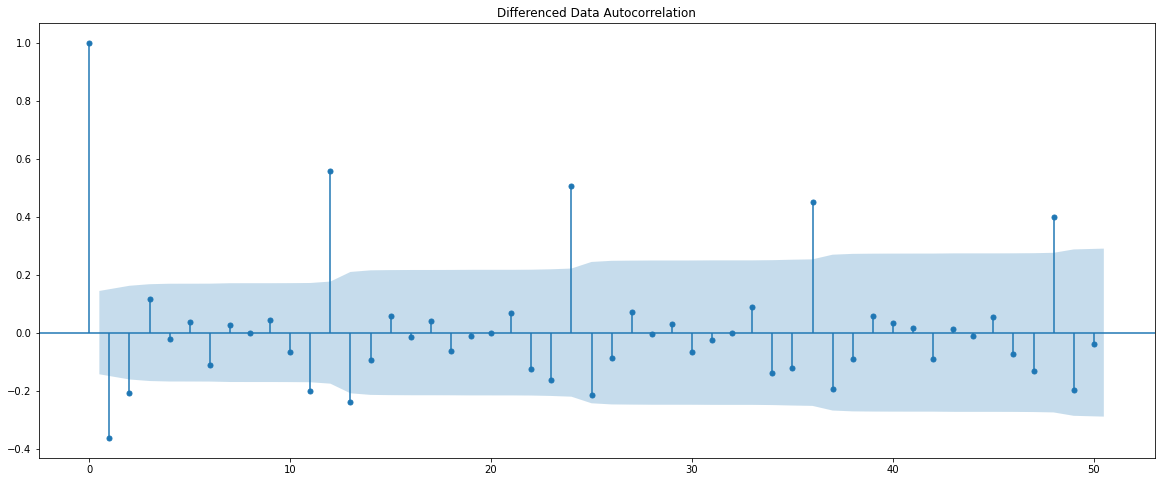

In [111]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

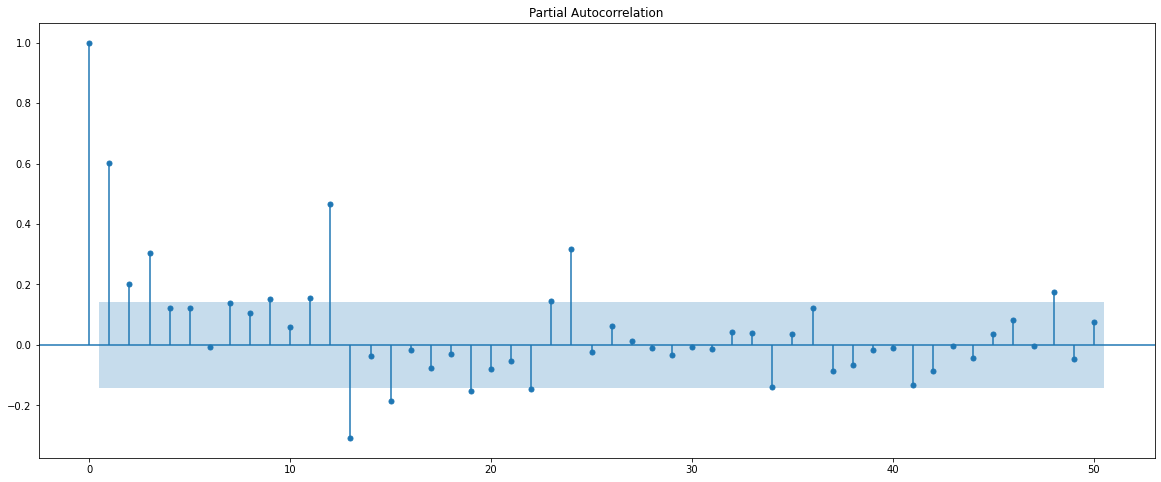

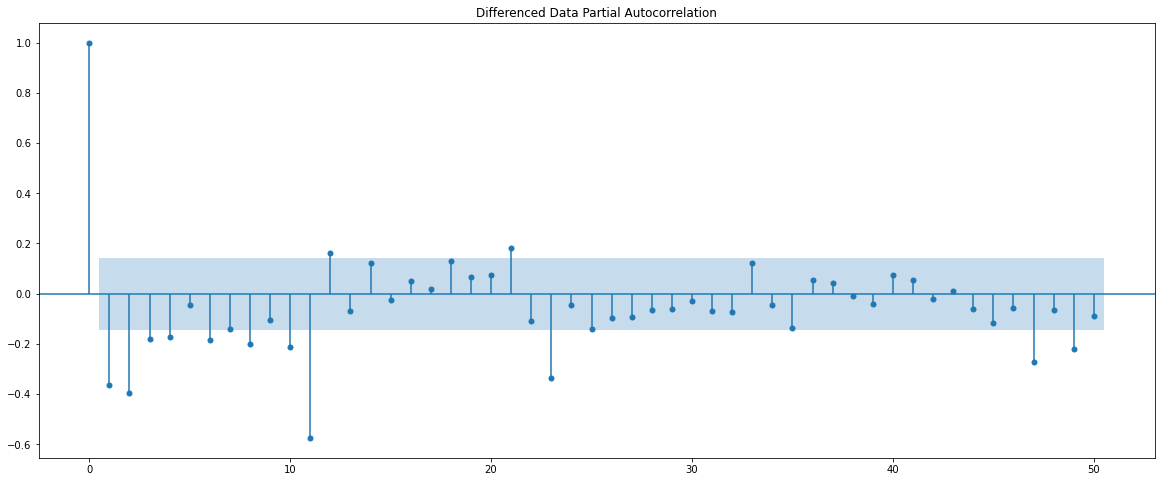

In [113]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be seasonality in the data.

# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

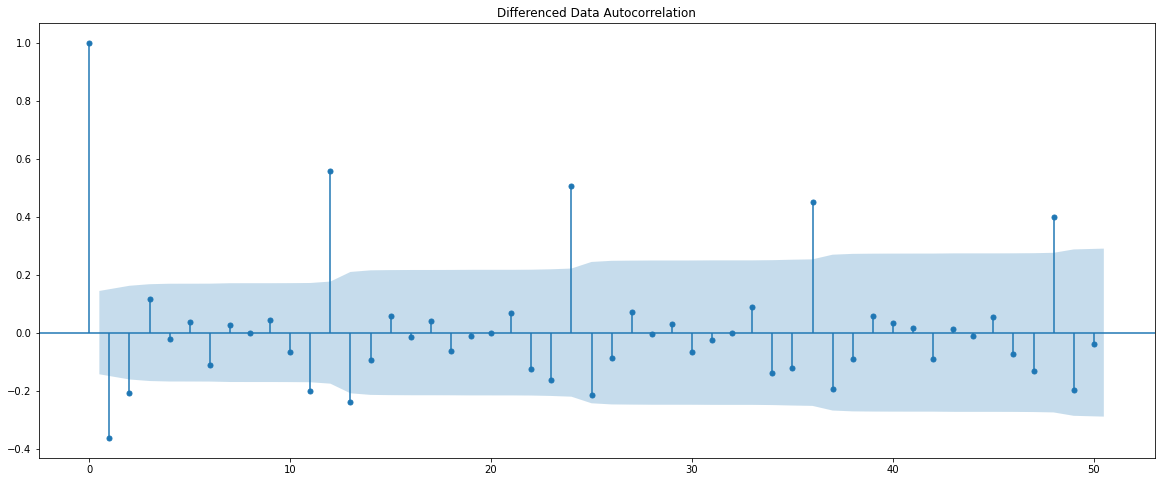

In [114]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there is a seasonality at 12. We will run our auto SARIMA models by setting seasonality to 12.

In [121]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [122]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [123]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7- AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7- AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12)7- AIC:965.5057301625761
SARIMA(0, 1, 0)x(0, 1, 2, 12)7- AIC:845.8687014776034
SARIMA(0, 1, 0)x(1, 1, 0, 12)7- AIC:982.3269589658806
SARIMA(0, 1, 0)x(1, 1, 1, 12)7- AIC:975.3375383601594
SARIMA(0, 1, 0)x(1, 1, 2, 12)7- AIC:847.7332182654582
SARIMA(0, 1, 0)x(2, 1, 0, 12)7- AIC:858.513269837442
SARIMA(0, 1, 0)x(2, 1, 1, 12)7- AIC:853.3390729144213
SARIMA(0, 1, 0)x(2, 1, 2, 12)7- AIC:842.6282244224952
SARIMA(0, 1, 1)x(0, 1, 0, 12)7- AIC:1113.7663133562912
SARIMA(0, 1, 1)x(0, 1, 1, 12)7- AIC:915.0730606718029
SARIMA(0, 1, 1)x(0, 1, 2, 12)7- AIC:790.903280926442
SARIMA(0, 1, 1)x(1, 1, 0, 12)7- AIC:944.2456655531254
SARIMA(0, 1, 1)x(1, 1, 1, 12)7- AIC:929.336248852011
SARIMA(0, 1, 1)x(1, 1, 2, 12)7- AIC:792.7161670319979
SARIMA(0, 1, 1)x(2, 1, 0, 12)7- AIC:810.3194350158657
SARIMA(0, 1, 1)x(2, 1, 1, 12)7- AIC:804.1555752719477
SARIMA(0, 1, 1)x(2, 1, 2, 12)7- AIC:782.1538715310048
SARIMA(0, 1, 2)x(0, 1, 0, 12)

In [124]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 1, 2, 12)",774.969119
53,"(1, 1, 2)","(2, 1, 2, 12)",776.940107
80,"(2, 1, 2)","(2, 1, 2, 12)",776.996102
17,"(0, 1, 1)","(2, 1, 2, 12)",782.153872
79,"(2, 1, 2)","(2, 1, 1, 12)",783.703652


In [125]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Wed, 22 Dec 2021   AIC                            774.969
Time:                                    14:20:39   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

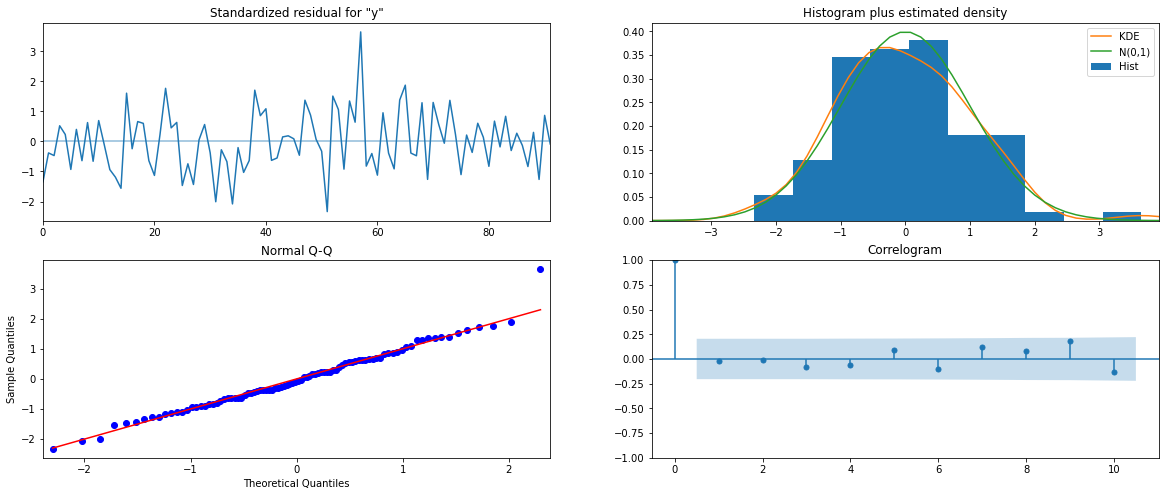

In [126]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model:

In [127]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [128]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,44.213702,14.221595,16.339888,72.087516
1,62.326494,14.300347,34.298328,90.354659
2,67.313459,14.302247,39.281570,95.345348
3,63.160861,14.305147,35.123289,91.198434
4,66.474470,14.310516,38.426374,94.522566


In [129]:
rmse_sarima_12 = metrics.mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse_sarima_12)

16.49994627107945


In [130]:
temp_results_df = pd.DataFrame({'Test RMSE': [rmse_sarima_12]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


results_df = pd.concat([results_df,temp_results_df])

results_df

,Test RMSE
RegressionOnTime,15.268885
NaiveModel,79.718559
SimpleAverageModel,53.460350
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451364
6pointTrailingMovingAverage,14.566269
9pointTrailingMovingAverage,14.727594
"Alpha=0.995,SimpleExponentialSmoothing",36.796020
"Alpha=0.1,SimpleExponentialSmoothing",36.827810
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923185


# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots at seasonality 12:

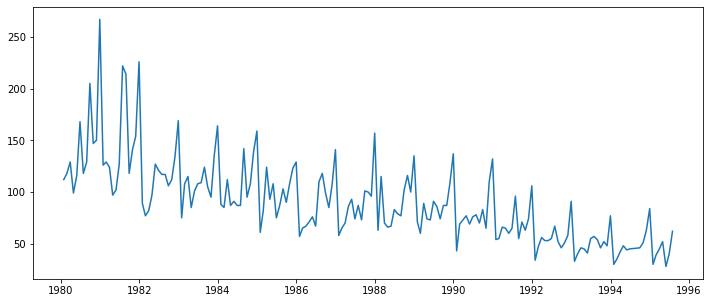

In [131]:
plt.figure(figsize=(12,5))
plt.plot(df['Rose'])

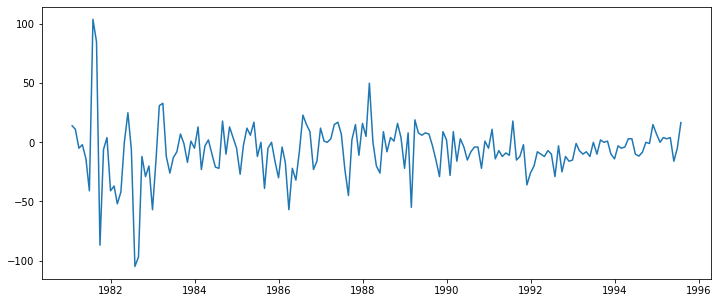

In [132]:
plt.figure(figsize=(12,5))
plt.plot(df['Rose'].diff(12).dropna())

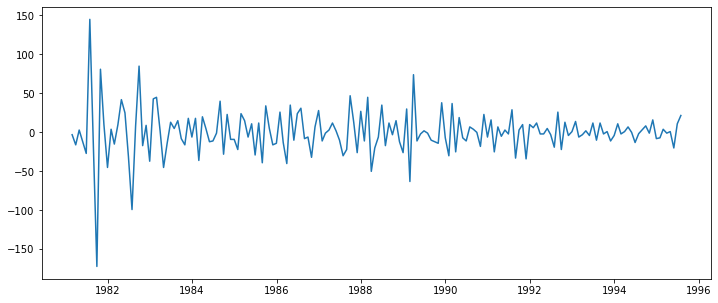

In [133]:
plt.figure(figsize=(12,5))
plt.plot((df['Rose'].diff(12).dropna()).diff().dropna())

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

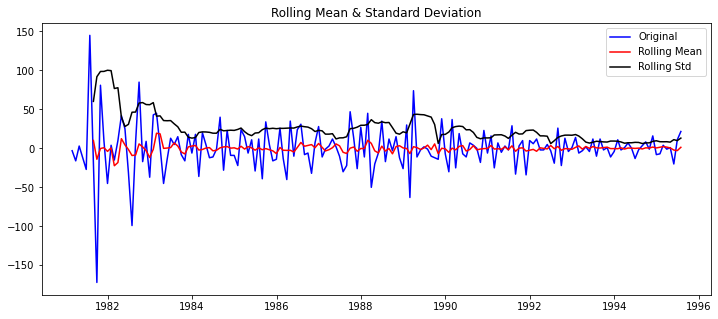

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [134]:
plt.figure(figsize=(12,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna())

Checking the ACF and the PACF plots for the new modified Time Series:

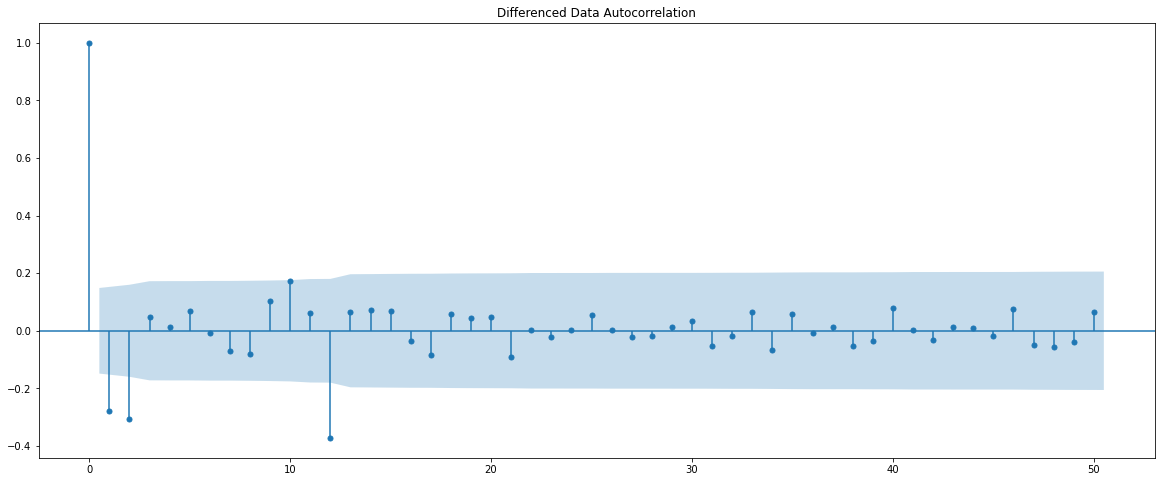

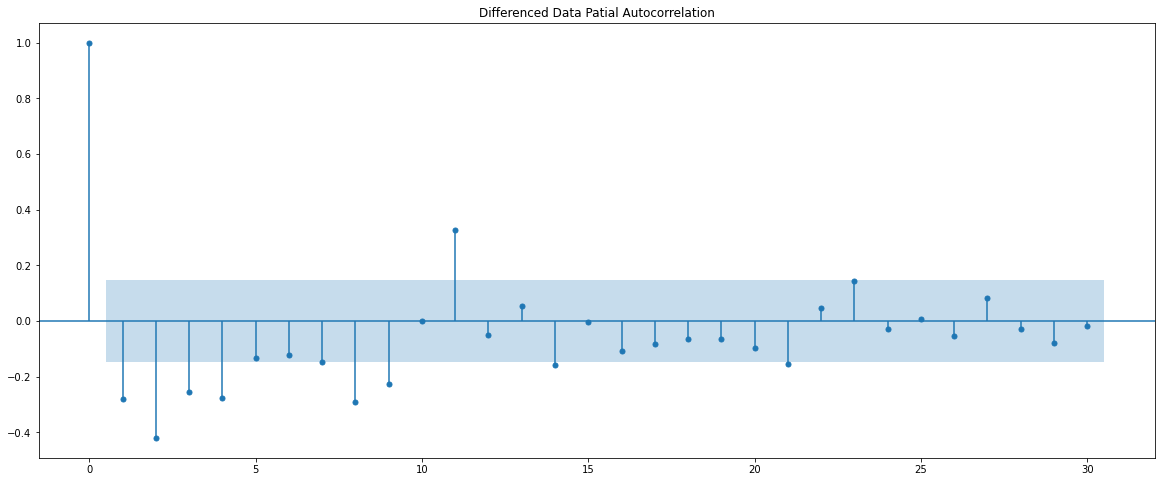

In [135]:
plot_acf((df['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((df['Rose'].diff(12).dropna()).diff().dropna(),lags=30,title='Differenced Data Patial Autocorrelation')
plt.show()

In [136]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -446.102
Date:                              Wed, 22 Dec 2021   AIC                            908.203
Time:                                      14:26:09   BIC                            929.358
Sample:                                           0   HQIC                           916.774
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8047      0.119     -6.778      0.000      -1.037      -0.572
ar.L2          0.03

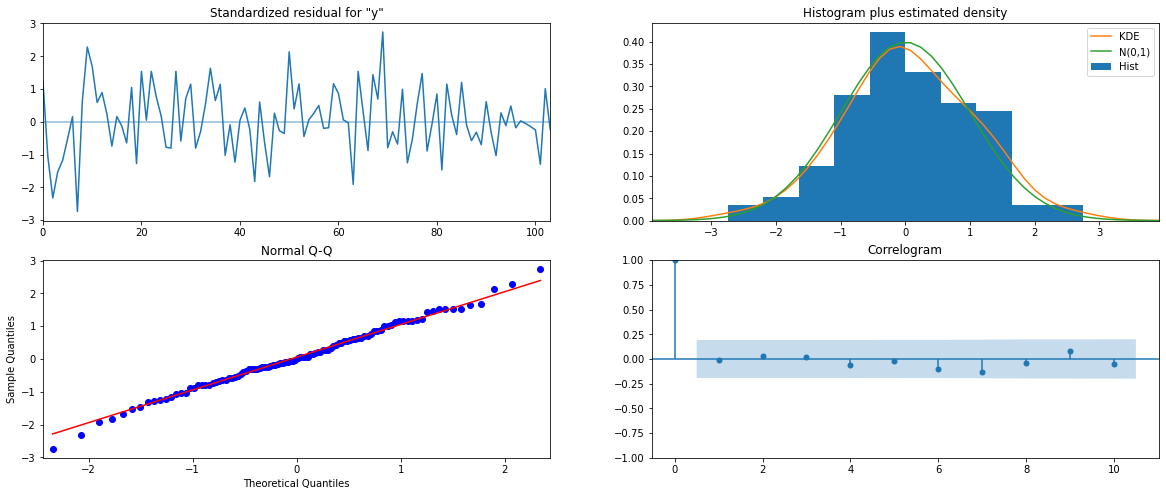

In [137]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model:

In [138]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [139]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,47.472012,17.322909,13.519735,81.424289
1,63.350277,18.228131,27.623797,99.076757
2,65.513214,18.257581,29.729013,101.297416
3,67.318166,18.259963,31.529296,103.107036
4,61.756083,18.260261,25.966629,97.545537


In [140]:
rmse_manualsarima_12 = metrics.mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse_manualsarima_12)

15.907335251550247


In [141]:
temp_results_df3 = pd.DataFrame({'Test RMSE': [rmse_manualsarima_12]}
                           ,index=['SARIMA(4,1,2)(0,1,1,12)'])


results_df = pd.concat([results_df,temp_results_df3])

results_df

,Test RMSE
RegressionOnTime,15.268885
NaiveModel,79.718559
SimpleAverageModel,53.460350
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451364
6pointTrailingMovingAverage,14.566269
9pointTrailingMovingAverage,14.727594
"Alpha=0.995,SimpleExponentialSmoothing",36.796020
"Alpha=0.1,SimpleExponentialSmoothing",36.827810
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923185


# Building the most optimum model on the Full Data:

In [143]:
results_df.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing",9.640616
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451364
6pointTrailingMovingAverage,14.566269
9pointTrailingMovingAverage,14.727594
RegressionOnTime,15.268885
"SARIMA(4,1,2)(0,1,1,12)",15.907335
"SARIMA(0,1,2)(2,0,2,12)",16.499946
"Alpha=0.065,Beta=0.051,Gamma==0.001,TripleExponentialSmoothing",20.989989
"Alpha=0.995,SimpleExponentialSmoothing",36.796020


This particular dataset has both trend and seasonality component. If we go by RMSE values of test data, Triple exponential smoothing(Alpha=0.1,Beta=0.2,Gamma=0.2) is giving low RMSE. Hence, we will go ahead and use TES model as well as SARIMA(4,1,2)(0,1,1,12) to forecast next 12 months using full data.

# Build TES Model on Rose full data:

In [144]:
model_TES_rose = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_rose_fit = model_TES_rose.fit(smoothing_level=0.1,smoothing_slope=0.2,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_rose_forecast = model_TES_rose_fit.forecast(steps=12)

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-144-e2e0b310f053>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_rose_fit = model_TES_rose.fit(smoothing_level=0.1,smoothing_slope=0.2,smoothing_seasonal=0.2,optimized=True,use_brute=True)


In [145]:
rmse_rose_tes_full = metrics.mean_squared_error(df['Rose'],model_TES_rose_fit.fittedvalues,squared=False)
print(rmse_rose_tes_full)

17.404344777191476


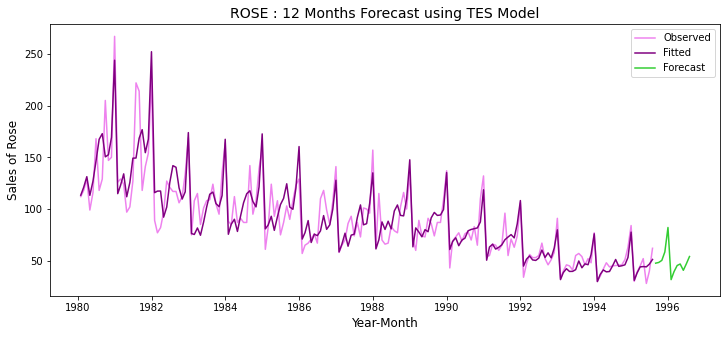

In [146]:
plt.figure(figsize=(12,5))

plt.plot(df['Rose'], label='Observed', color = 'violet')
plt.plot(model_TES_rose_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

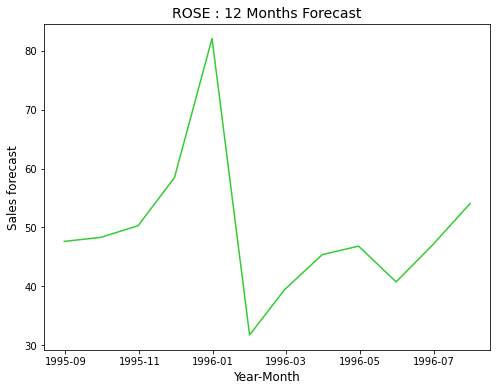

In [147]:
plt.figure(figsize=(8,6))
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('ROSE : 12 Months Forecast', fontsize=14)

# Build SARIMA Model on Rose full data:

In [155]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(4,1,2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -658.935
Date:                              Wed, 22 Dec 2021   AIC                           1333.871
Time:                                      14:28:10   BIC                           1358.422
Sample:                                  01-31-1980   HQIC                          1343.841
                                       - 07-31-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8240      0.083     -9.941      0.000      -0.986      -0.662
ar.L2          0.04

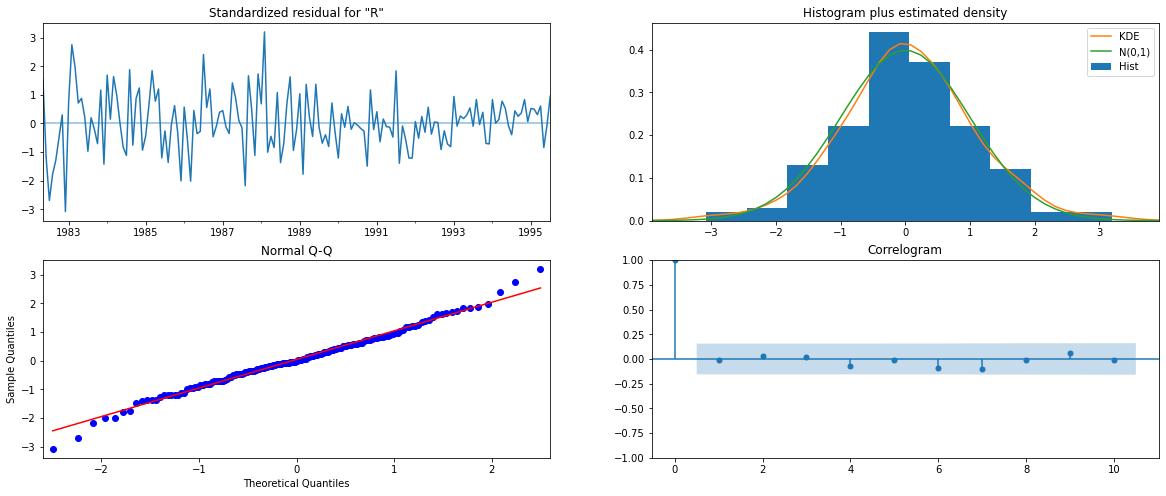

In [156]:
results_full_data_model.plot_diagnostics();

In [162]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [163]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,48.275015,15.053293,18.771102,77.778927
1995-09-30,44.986052,15.830594,13.958659,76.013445
1995-10-31,45.475133,15.888937,14.333389,76.616877
1995-11-30,54.809105,15.898944,23.647748,85.970463
1995-12-31,81.906201,15.913702,50.715919,113.096484


In [164]:
rmse_auto_SARIMA_12_full_data = metrics.mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_auto_SARIMA_12_full_data)

RMSE of the Full Model 32.21814640177266


In [167]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

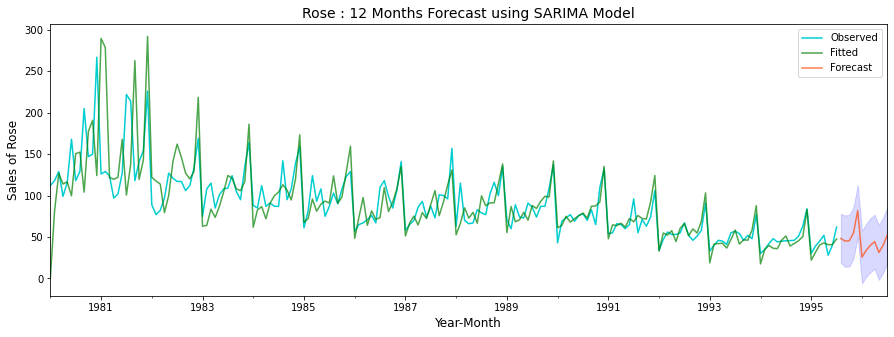

In [168]:
# plot the forecast along with the confidence band

plt.figure(figsize=(15,5))

axis = df['Rose'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('Rose : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

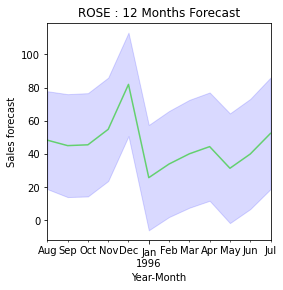

In [169]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'limegreen')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('ROSE : 12 Months Forecast', fontsize=12)

In [170]:
forecast = pd.DataFrame({'ROSE':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

,ROSE
1995-08-31,48.28
1995-09-30,44.99
1995-10-31,45.48
1995-11-30,54.81
1995-12-31,81.91
1996-01-31,25.67
1996-02-29,33.90
1996-03-31,40.05
1996-04-30,44.38
1996-05-31,31.34


In [171]:
forecast.describe()

,ROSE
count,12.000000
mean,45.259167
std,14.325373
min,25.670000
25%,38.415000
50%,44.685000
75%,49.305000
max,81.910000


In [172]:
forecast.sum()

ROSE    543.11
dtype: float64

# Inferences:

* The model forecasts sale of 543 units of Rose wine 12 months into future, which is an average sale of 45 units per month.

* The seasonal sale in December will reach maximum units of 82 units before it drops to lowest sale in January 1996 at 25 units.

* Unline sparkling wine, Rose wine sells very low number of units and the standard deviation is only 14.3. It means higher demand will not impact procurement and production.

* Apart from high sales in November and December, Rose wine sales will be above average in summer months of July and August.

* Trend in sales of Rose is continuously decreasing over the period. Detailed study may be required to see whetherdecreasing trend is due to change in customer preference or due to substitution. 

* Seasonality of sales is observed and higher sales is maintained in the end of the year. Some promotion schemes and improvement / quality enhancers in theproduct can be examined so as to attract new young generation customers.